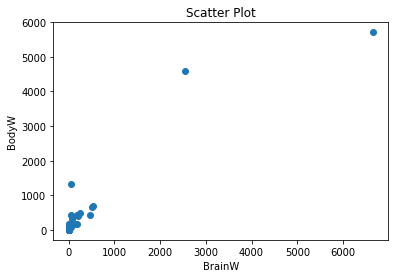

Test Mean Squared Error : 80612.23576166225
Test Root Mean Squared Error : 283.92293982991623
Coefficient Of Determination : 0.31306040595448725


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

df = pd.read_csv("BrainBody.csv")
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 

plt.scatter(df.BrainW, df.BodyW)
plt.xlabel("BrainW")
plt.ylabel("BodyW")
plt.title("Scatter Plot")
plt.show()

y_test_pred = lm_1.intercept_ + lm_1.coef_*X_test 
lm = LinearRegression()     # Create linear Regression Object
lm.fit(df[['BrainW']],df['BodyW'])

lm_1 = LinearRegression()
lm_1.fit(X_train,y_train)
y_pred = lm_1.predict(X_test)
#print(y_pred)

#print(lm_1.coef_ , lm_1.intercept_)
print('Test Mean Squared Error :',mean_squared_error(y_test,y_test_pred))

print('Test Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Coefficient Of Determination :',r2_score(y_test,y_test_pred))

In [85]:
y_pred = lm_1.predict(X_train)
y_train_pred = lm_1.intercept_ + lm_1.coef_*X_train 
print('Train Mean Squared Error :',mean_squared_error(y_train,y_train_pred))

print('Train Root Mean Squared Error :',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Coefficient Of Determination :',r2_score(y_train,y_train_pred))

Train Mean Squared Error : 121020.43441956265
Train Root Mean Squared Error : 347.8799137914729
Coefficient Of Determination : 0.8969481012772117


## train RMSE =347.8799
## test RMSE=283.9222
## train R square=0.8969
## test R square= 0.3130
## As there is huge difference in RMSE values of train set and test set, this model is not good fit. There should be less difference between these values so that it should be close to each other.
## moreover R square value for train set is close to 1 and that of test set is close to 0 which indicates that it is case of overfitting.
## and test RMSE < train RMSE implies overfitting

# Using Stats.model.api

In [88]:
import statsmodels.formula.api as smf 
seed = 10
test_size = 0.3
trainingSet, testSet = train_test_split(df, test_size = test_size, random_state = seed)

model_1 = smf.ols(formula = 'BodyW ~ BrainW', data = trainingSet)
result = model_1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  BodyW   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     356.9
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           7.64e-22
Time:                        23:55:25   Log-Likelihood:                -312.64
No. Observations:                  43   AIC:                             629.3
Df Residuals:                      41   BIC:                             632.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.3853     55.654      1.373      0.1

In [89]:
model_2 = smf.ols(formula = 'BodyW ~ BrainW', data = testSet)
result = model_2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  BodyW   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     8.639
Date:                Sat, 18 Jan 2020   Prob (F-statistic):            0.00917
Time:                        23:56:01   Log-Likelihood:                -133.95
No. Observations:                  19   AIC:                             271.9
Df Residuals:                      17   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.7106     79.978      1.372      0.1

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


## we hereby agree that this assignment is done in group and is original 
## group members: Sourav Gajbhiye and Shinakshi Sankhayan